In [1]:
from __future__ import print_function
from imutils import perspective
from imutils import contours
import numpy as np
import argparse
import imutils
import cv2
from scipy.spatial import distance as dist

In [2]:
def order_points_old(pts):
    rect = np.zeros((4, 2), dtype="float32")
    
    s = pts.sum(axis=1)
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]
    
    diff = np.diff(pts, axis=1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]
    
    return rect

In [3]:
order_points_old(np.array([[1,2], [3,4], [5, 6], [7,8]]))


array([[1., 2.],
       [1., 2.],
       [7., 8.],
       [1., 2.]], dtype=float32)

In [4]:
def order_points(pts):
    xSorted = pts[np.argsort(pts[:, 0]), :]
    
    leftMost =  xSorted[:2, :]
    rightMost = xSorted[2:, :]
    
    leftMost = leftMost[np.argsort(leftMost[:, 1]), :]
    (tl, bl) = leftMost
    
    D = dist.cdist(tl[np.newaxis], rightMost, "euclidean")[0]
    (br, tr) = rightMost[np.argsort(D)[::-1], :]
    
    return np.array([tl, tr, br, bl], dtype="float32")

In [5]:
order_points(np.array([[0,0], [2,0], [0,2], [2, 2]]))

array([[0., 0.],
       [2., 0.],
       [2., 2.],
       [0., 2.]], dtype=float32)

In [8]:
# ap = argparse.ArgumentParser()
# ap.add_argument("-n", "--new", type=int, default=-1, 
#                 help="whether or not the new order points should be used")
# args = vars(ap.parse_args())

image = cv2.imread("../data/example.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (7,7), 0)

edged = cv2.Canny(gray, 50, 100)
edged = cv2.dilate(edged, None, iterations=1)
edged = cv2.erode(edged, None, iterations=1)


In [9]:
import matplotlib.pyplot as plt

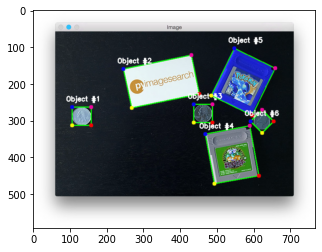

In [10]:
plt.imshow(image)

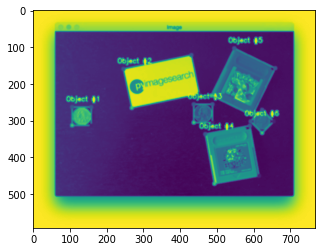

In [11]:
plt.imshow(gray)

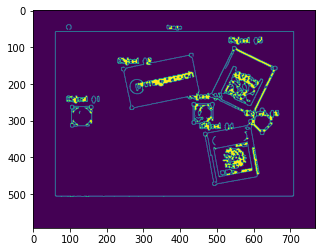

In [12]:
plt.imshow(edged)